In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date, time
import datetime

In [7]:
def CashFlow (df_sdelka_cf,df_sdelka_id,df_cf, date_begin, date_gap, n_int, input_output_only=False):
    def Trans (x):
        return(x.days)

    def Cod_sd (x):
        if x == 'Вложения в ценные бумаги и прочие финансовые активы, оцениваемые через ПУ':
            c='C001'
        elif x == 'Ссуды и средства, размещенные в банках':
            c='C002'
        elif x == 'Ссуды и средства, предоставленные клиентам':
            c='C003'
        elif x == 'Вложения в ценные бумаги и прочие финансовые активы, оцениваемые через ПСД':
            c='C004'
        elif x == 'Вложения в ценные бумаги и прочие финансовые активы, оцениваемые по АС':
            c='C005'
        elif x == 'Основные средства, переданные в финансовый лизинг':
            c='C006'
        elif x == 'Инвестиции в дочерние компании':
            c='C007'
        elif x == 'Инвестиции в ассоциированные компании':
            c='C008'
        elif x == 'Прочие инвестиции':
            c='C009'
        elif x =='Основные средства и НМА':
            c='C010'
        elif x =='Прочие активы':
            c='C011'
        elif x =='Проблемные активы':
            c='C012'
        elif x =='Средства банков':
            c='C013'
        elif x =='Счета клиентов до востребования':
            c='C014'
        elif x =='Срочные депозиты клиентов':
            c='C015'
        elif x =='Векселя':
            c='C016'
        elif x =='Облигации':
            c='C017'
        elif x == 'Депозитные сертификаты':
            c='C018'
        elif x == 'Сберегательные сертификаты':
            c='C019'
        elif x == 'Субординированный займ':
            c='C020'
        elif x == 'Прочие пассивы':
            c='C021'
        elif x == 'Уставный капитал и фонды':
            c='C022'
        elif x == 'Обязательства по налогам':
            c='C023'
        elif x == 'Административно-хозяйственные расходы':
            c='C024'
        elif x == 'Нераспределенная прибыль прошлых лет, фонды и эмиссионные разницы':
            c='C025'  
        else:
            c='неверный тип операции'
        return(c)

    def Cod_co (x):
        if x == 'Органы власти РФ':
            c='001'
        elif x == 'Муниципальные и местные органы власти РФ':
            c='002'
        elif x == 'Органы власти иностранных государств':
            c='003'
        elif x == 'Банки-резиденты':
            c='004'
        elif x == 'Банки-нерезиденты':
            c='005'
        elif x == 'Корпоративные клиенты-резиденты':
            c='006'
        elif x == 'Корпоративные клиенты-нерезиденты':
            c='007'
        elif x == 'Субъекты малого предпринимательства':
            c='008'
        elif x == 'Частные лица-резиденты':
            c='009'
        elif x =='Частные лица-нерезиденты':
            c='010'
        elif x =='Здания и сооружения':
            c='011'
        elif x =='Транспортные средства':
            c='012'
        elif x =='Компьютеры':
            c='013'
        elif x =='Мебель и прочее оборудование':
            c='014'
        elif x =='Нематериальные активы':
            c='015'
        elif x =='Прочее имущество':
            c='016'
        elif x =='Наш банк':
            c='017'
        elif x == 'Расчеты по налогу на прибыль':
            c='018'
        elif x == 'Расчеты по налогу на ценные бумаги':
            c='019'
        elif x == 'Расчеты по прочим налогам':
            c='020'
        elif x == 'Чистый процентный доход':
            c='021'
        elif x == 'Чистый торговый доход':
            c='022'
        elif x == 'Чистый комиссионный доход':
            c='023'
        elif x == 'Прочие операционные доходы/расходы':
            c='024'
        elif x == 'Административно-хозяйственные расходы':
            c='025'
        elif x == 'Расходы по налогам':
            c='026'
        else:
            c='неверный тип контрагента/вида расчетов'
        return(c)

    # разбиваем код в CF_format_new на три колонки, чтобы распознать на что заканчивается 
    CFforma = pd.read_excel("CF_format_new.xlsx")

    CFforma['Код'].fillna('0')
    words=CFforma['Код'].fillna('0').tolist()

    word=words[2]
    myList=[word[i:i+3] for i in range(1, len(word), 3)]
    myList=pd.DataFrame(myList).T
    for j in range(2,len(CFforma['Код'])):
        word=words[j]
        myList1=[word[i:i+3] for i in range(1, len(word), 3)]
        myList1=pd.DataFrame(myList1).T

        if len(myList1.columns)==3: 
            myList=myList.append(myList1)
    myList=myList[1:]

    codeCommon='C'+myList[0]+myList[1]+myList[2]
    codeCommon=list(codeCommon)

    # Индексы для ГЭПа
    GapInput=myList.loc[
    #     (myList[0]=='001')&(myList[2]=='01')|
               (myList[0]=='002')&(myList[2]=='01')|
               (myList[0]=='003')&(myList[2]=='01')]
    #            (myList[0]=='004')&(myList[2]=='01')|
    #            (myList[0]=='005')&(myList[2]=='01')

    codeGapInput='C'+GapInput[0]+GapInput[1]+GapInput[2]
    codeGapInput=list(codeGapInput)

    GapOutput=myList.loc[
    #     (myList[0]=='013')&(myList[2]=='02')|
    #            (myList[0]=='014')&(myList[2]=='02')|
               (myList[0]=='015')&(myList[2]=='02')|
    #            (myList[0]=='016')&(myList[2]=='02')|
               (myList[0]=='017')&(myList[2]=='02')]
    #            (myList[0]=='018')&(myList[2]=='02')|
    #            (myList[0]=='019')&(myList[2]=='02')|
    #            (myList[0]=='020')&(myList[2]=='02')]
    codeGapOutput='C'+GapOutput[0]+GapOutput[1]+GapOutput[2]
    codeGapOutput=list(codeGapOutput)
    
    
    def CF_Group(df_sdelka_id,df_sdelka_cf,df_cf, date_begin, date_gap, n_int):
        df_sdelka_cf.rename(columns = {'Уникальный код сделки':'id_sd',
                               'Дата очередного изменения':'data',
                               'Курс руб./единица вал.опер.':'course',
                               'Процентная ставка/Спред/ Купон/ Норма амортизации':'int_rate',
                               'Ставка комиссии к получению':'com_income_rate',
                               'Ставка комиссии к уплате':'com_expense_rate',
                               'Номинал ценной бумаги':'par_val_sec',
                               'Рыночная котировка актива':'market_rate',
                               'Изменение числа бумаг (для цен.бум.)':'change_numb_sec',
                               'Число бумаг (для цен.бум.)':'numb_sec',
                               'Число бумаг переданных по договору займа/сделке РЕПО':'numb_sec_pledged',
                               'Число бумаг полученных по договору займа/сделке РЕПО':'numb_sec_received',
                               'Изменение остатка по счету в валюте операции за период':'change_acc_cur',
                               'Остаток по счету в валюте операции на дату':'acc_cur',
                               'Изменение остатка по счету в руб. за период':'change_acc_rub',
                               'Остаток по счету в руб. на дату':'acc_rub',
                               'Наращенные проценты за период (в валюте операции)':'accrued_int_cur',
                               'Наращенные проценты за период (в руб.)':'accrued_int_rub',
                               'Проценты за период (в валюте операции)':'int_cur',
                               'Проценты за период (в руб.)':'int_rub',
                               'Комиссии полученные за период (в валюте операции)':'com_income_cur',
                               'Комиссии полученные за период (в руб.)':'com_income_rub',
                               'Комиссии уплаченные за период (в валюте операции)':'com_expense_cur',
                               'Комиссии уплаченные за период (в руб.)':'com_expense_rub',
                               'Норма резервирования по РСБУ/ Ставка ФОР':'res_rate_RSBU',
                               'Размер резерва по РСБУ/ФОР на дату (в валюте операции)':'res_accrued_RSBU_cur',
                               'Размер резерва по РСБУ/ФОР на дату (в руб.)':'res_accrued_RSBU_rub',
                               'Норма оценочного резерва/ФОР':'res_rate_IFRS',
                               'Размер ОЦ/ФОР на дату (в валюте операции)':'res_accrued_IFRS_cur',
                               'Размер ОЦ/ФОР на дату (в руб.)':'res_accrued_IFRS_rub',
                               'Размер положительной переоценки по СС на дату (в вал.операции)':'gain_cur',
                               'Размер положительной переоценки по СС на дату (в руб.)':'gain_rub',
                               'Размер отрицательной переоценкипо СС на дату (в вал.операции)':'loss_cur',
                               'Размер отрицательной переоценкипо СС на дату (в руб.)':'loss_rub',
                               'Реализолванный торговый доход на дату (в вал.операции)':'traide_inc_cur',
                               'Реализолванный торговый доход на дату (в руб.)':'traide_inc_rub',
                               'Реализолванный торговый убыток на дату (в вал.операции)':'traide_loss_cur',
                               'Реализолванный торговый убыток на дату (в руб.)':'traide_loss_rub',
                               'Прочие операционные доходы за период (в валюте операции)':'other_op_inc_cur',
                               'Прочие операционные доходы  за период (в руб.)':'other_op_inc_rub',
                               'Прочие операционные расходы  за период (в валюте операции)':'other_op_exp_cur',
                               'Прочие операционные расходы  за период (в руб.)':'other_op_exp_rub'}, inplace = True)
        df_sdelka_id.rename(columns = {'ID сделки':'id_sd',
                               'Признак включения сделки в расчет (1-включать, 0 - не включать)':'key_incl',
                               'Тип сделки':'type_sd',
                               'Тип контрагента':'type_counterparty',
                               'ЦФО':'resp_unit',
                               'Контрагент/ Портфель':'counterparty',
                               'Валюта операции':'cur_sd',
                               'Дата начала':'data_begin',
                               'Дата окончания':'data_end',
                               'Спред к базовой ставке/ Купон/ Норма амортизации/ Норма дивидендов':'interest rate',
                               'Ставка комиссии к получению':'com_inc_rate',
                               'Ставка комиссии к уплате':'com_exp_rate',
                               'Сумма первоначальных инвестиций':'amount',
                               'Ставка РВП/ФОР на момент начала сделки':'res_rate_1',
                               'Ставка ОР/ФОР на момент выдачи кредита':'res_rate_2',
                               'Схема обслуживания основного долга/ обязательства':'scheme_sd_1',
                               'Схема выплат процентов/ амортизации':'scheme_sd_2',
                               'Схема выплат комиссий':'scheme_sd_3',
                               'Схема начисления резервов/переоценки':'scheme_sd_4',
                               'Чувствительность к изменению процентных ставок':'rate_sens_type',
                               'Уровень санкционированности':'level_authorization',
                               'Операция/ портфель':'ind_portf',
                               'Серия, транш, № выпуска для Цен. бум.':'id_sec',
                               'Номинал бумаги (в валюте номинала)':'par_val_sec_cur',
                               'Стоимость приобретения (в% от номинала)':'quotation_cost_sec',
                               'НКД уплаченный в валюте операции':'acc_coupon_yield_paid',
                               'Рейтинг контрагента':'rating'}, inplace = True)
        
        df_sdelka_cf['data']=pd.to_datetime(df_sdelka_cf['data'])
   
        df_cf.rename(columns = {'Код':'cod_sd', 
                               'АКТИВЫ':'assets'}, inplace = True)
        
        df_cf=df_cf.set_index('cod_sd')
    
        #корзины и названия столбцов для прогноза CF    
        df_sdelka_cf['gap_to_date_begin']=df_sdelka_cf['data']-date_begin
        df_sdelka_cf['gap_to_date_begin'] = df_sdelka_cf['gap_to_date_begin'].apply(Trans)
#             print('Число интервалов прогноза', self.n_int)
        db=str(date_begin.day) + '.' + str(date_begin.month) + '.' + str(date_begin.year)
        time_int=['до '+db,db]
        backet_cf=[-1,0]
        data_backets = pd.date_range(date_begin, periods = n_int, freq = date_gap)
        for i in range(0,n_int):
            backet_cf.append(i+1)
            if i==0:
                gr1=db+'-'+str(data_backets[i].day) + '.' + str(data_backets[i].month) + '.' + str(data_backets[i].year)
            else:
                gr1=(str(data_backets[i-1].day) + '.' + str(data_backets[i-1].month) + '.' + str(data_backets[i-1].year) + '-' 
                        + str(data_backets[i].day) + '.' + str(data_backets[i].month) + '.' + str(data_backets[i].year))
            time_int.append(gr1)
        backet_cf.append(n_int+1)
        gr1='после '+ str(data_backets[n_int-1].day) + '.' + str(data_backets[n_int-1].month) + '.' + str(data_backets[n_int-1].year)
        time_int.append(gr1)
#             print(len(time_int),time_int)
#             print(len(backet_cf),backet_cf)
        
        # Добавление столбцов под корзины CF
        for i in range(0,n_int+3):
            df_cf[time_int[i]]=0
        
        def Backets (data_sd):
            if data_sd<date_begin:
                nback = time_int[0]
            elif data_sd==date_begin:
                nback = time_int[1]
            elif data_sd>data_backets[n_int-1]:
                nback = time_int[n_int+2]
            else:
                for i in range(0,n_int):
                    if data_sd <= data_backets[i]:
                        nback = time_int[i+2]
                        break
            return(nback)
        
        df_sdelka_cf['backet'] = df_sdelka_cf['data'].apply(Backets)
        df_sdelka_id['cod_type_sd'] = df_sdelka_id['type_sd'].apply(Cod_sd)
        df_sdelka_id['cod_type_co'] = df_sdelka_id['type_counterparty'].apply(Cod_co)
        
        #код сделки
        df_sdelka_id['cod_cf']=df_sdelka_id['cod_type_sd']+df_sdelka_id['cod_type_co'] 
        
        #присвоение буквенному коду, код цифровой         
        df_sdelka_cf['cod_cf'] = ''
        for row in df_sdelka_id.iterrows():
            cod=row[1][0]
            a=row[1][29]
#             print(cod,a)
            indx = df_sdelka_cf[df_sdelka_cf['id_sd']==cod].index
            df_sdelka_cf.loc[indx, 'cod_cf'] = a

        df_sdelka_cf['input_cf']=df_sdelka_cf.change_acc_rub[df_sdelka_cf['change_acc_rub']>=0]
        df_sdelka_cf['output_cf']=df_sdelka_cf.change_acc_rub[df_sdelka_cf['change_acc_rub']<0]

        #группировка по кодам сделок и корзинам CF
        group = df_sdelka_cf.groupby(['cod_cf','backet'])
        return [group, df_cf,df_sdelka_id, df_sdelka_cf]    
    
    
    group1=CF_Group(df_sdelka_id,df_sdelka_cf,df_cf, date_begin, date_gap, n_int)
    
    # входящий поток по счетам требований/обязательств
    def df_input_acc (group) :
        df_input_acc=group.input_cf.sum().unstack()
        df_input_acc=df_input_acc.fillna(0)
        indold=df_input_acc.index.tolist()
        indnew=['']*(len(indold)-2)
        newindex1={}
        for i in range(1,len(indold)-1):
            indnew[i-1]=indold[i]+'01'
            newindex1[indold[i]]=indnew[i-1]
        df_input_acc=df_input_acc[1:-1].rename(index = newindex1)
        return df_input_acc

    # исходящий поток по счетам требований/обязательств
    def df_output_acc (group) :
        df_output_acc=group.output_cf.sum().unstack()
        df_output_acc=df_output_acc.fillna(0)
        indold=df_output_acc.index.tolist()
        indnew=['']*(len(indold)-2)
        newindex2={}
        for i in range(1,len(indold)-1):
            indnew[i-1]=indold[i]+'02'
            newindex2[indold[i]]=indnew[i-1]
        df_output_acc=df_output_acc[1:-1].rename(index = newindex2)
        return df_output_acc

    #поток по процентам
    def df_interest (group) :
        df_interest = group.int_rub.sum().unstack()
        df_interest=df_interest.fillna(0)
        indold=df_interest.index.tolist()
        indnew=['']*(len(indold)-2)
        newindex3={}
        for i in range(1,len(indold)-1):
            indnew[i-1]=indold[i]+'03'
            newindex3[indold[i]]=indnew[i-1]
        df_interest=df_interest[1:-1].rename(index = newindex3)
        return df_interest

    #поток по комиссиям полученным
    def df_com_income (group) :
        df_com_income = group.com_income_rub.sum().unstack()
        df_com_income=df_com_income.fillna(0)
        indold=df_com_income.index.tolist()
        indnew=['']*(len(indold)-2)
        newindex4={}
        for i in range(1,len(indold)-1):
            indnew[i-1]=indold[i]+'04'
            newindex4[indold[i]]=indnew[i-1]
        df_com_income=df_com_income[1:-1].rename(index = newindex4)
        return df_com_income

    #поток по комиссиям уплаченным
    def df_com_expense (group) :
        df_com_expense = group.com_expense_rub.sum().unstack()
        df_com_expense=df_com_expense.fillna(0)
        indold=df_com_expense.index.tolist()
        indnew=['']*(len(indold)-2)
        newindex5={}
        for i in range(1,len(indold)-1):
            indnew[i-1]=indold[i]+'05'
            newindex5[indold[i]]=indnew[i-1]
        df_com_expense=df_com_expense[1:-1].rename(index = newindex5)
        return df_com_expense
    
    #CF в разрезе видов потоков
# для group1
    col_df_cf1 = df_input_acc(group1[0]).columns.tolist()
    ind1_df_cf1 = df_input_acc(group1[0]).index.tolist()
    ind2_df_cf1 = df_output_acc(group1[0]).index.tolist()
    ind3_df_cf1 = df_interest(group1[0]).index.tolist()
    ind4_df_cf1 = df_com_income(group1[0]).index.tolist()
    ind5_df_cf1 = df_com_expense(group1[0]).index.tolist()

    def CF (uniqRow,uniqDf):

        for row in uniqRow:
            for col in col_df_cf1:
                if row in codeCommon:
                    group1[1].loc[row,col] = uniqDf.loc[row,col]  
        return group1[1]  
    cf1111=[]
    cf1111=pd.DataFrame(cf1111)
    cf1=CF(ind1_df_cf1,df_input_acc(group1[0]))
    cf1=CF(ind2_df_cf1,df_output_acc(group1[0]))
    
    if (input_output_only==False):
        cf1=CF(ind3_df_cf1,df_interest(group1[0]))
        cf1=CF(ind4_df_cf1,df_com_income(group1[0]))
        cf1=CF(ind5_df_cf1,df_com_expense(group1[0]))
    cf1111=cf1

    # все индексы, которые есть в кэш флоу и присутствуют в гэп group1
    def CF_itog (cf):
        cf=cf.T
        list_differenceIn = [item for item in cf.columns if item not in codeGapInput]
        list_needIn=[item for item in cf.columns if item not in list_differenceIn]

        list_differenceOut = [item for item in cf.columns if item not in codeGapOutput]
        list_needOut=[item for item in cf.columns if item not in list_differenceOut]

        # Заполняем CF итогом и гэпом
        cf['itog']=cf[1:].sum(axis=1)
        cf['cum_itog']=cf['itog'].cumsum()

        # откомментировать чтобы создать столбец  In
        cf['In']=cf['C00300101']+cf['C00300201']  
        cf['Out']=cf['C00300101']+cf['C00300201']  
        # нет С013-С020 в CF поэтому столбец заполнен 0, если будут откомментировать цикл for
        #cf['Out']=cf.fillna(0) 

        for i in range(len(list_needIn)):
            cf['In']+=cf[list_needIn[i]]

        for i in range(len(list_needOut)):
            cf['Out']+=cf[list_needOut[i]]
        # print(cf)

        cf.loc['assets','In']=0
        cf.loc['assets','Out']=0
        cf['gap']=cf['In']+cf['Out']
        cf['gap_cum_itog']=cf['gap'].cumsum()
        cf=cf.T  
        return cf

    cf_itog1=CF_itog(cf1111)
#     return cf_itog1.to_excel("CF_base_example.xlsx")
    return cf_itog1

# Ввод даты начала, глубины и шага прогноза

In [52]:
df_sdelka_id = pd.read_excel('CF_deals_s_CF_ozh-2_1.xlsx','Deals_id')

# CF_дог, CF_ож, CF_stress  
df_sdelka_cf1 = pd.read_excel('CF_deals.xlsx', 'CF_дог', skiprows=1)
df_sdelka_cf2 = pd.read_excel('CF_deals_s_CF_ozh-2_1.xlsx', 'CF_ож', skiprows=1)
# df_sdelka_cf3 = pd.read_excel('CF_deals_s_CF_ozh.xlsx', 'CF_stress', skiprows=1)
#Формат для расчета CF
df_cf = pd.read_excel('CF_format_new.xlsx', 'CF')

#Ввод даты начала, глубины и шага прогноза
date_beg = (input('Введите дату начала сделки в формате DD/MM/YYYY: '))
date_begin = pd.to_datetime(date_beg)
date_gap = str(input('Введите шаг прогноза в формате: ND/NM/NY '))
n_int = int(input('Введите число периодов прогноза: '))

Введите дату начала сделки в формате DD/MM/YYYY: 05.05.2015
Введите шаг прогноза в формате: ND/NM/NY 1Y
Введите число периодов прогноза: 12


In [ ]:
# для чтения из файла 
#базовый сценарий 
# cf_itog1 = pd.read_excel('CF_base.xlsx')
# ожидаемый сценарий 
# cf_itog2 = pd.read_excel('CF_expect.xlsx')

# CF для договорного и ожидаемого потока

In [53]:
cf_itog1=CashFlow (df_sdelka_cf1,df_sdelka_id,df_cf, date_begin, date_gap, n_int)
cf_itog2=CashFlow (df_sdelka_cf2,df_sdelka_id,df_cf, date_begin, date_gap, n_int)

## для договорного

In [54]:
cf_itog1[-6:]

,assets,до 5.5.2015,5.5.2015,5.5.2015-31.12.2015,31.12.2015-31.12.2016,31.12.2016-31.12.2017,31.12.2017-31.12.2018,31.12.2018-31.12.2019,31.12.2019-31.12.2020,31.12.2020-31.12.2021,31.12.2021-31.12.2022,31.12.2022-31.12.2023,31.12.2023-31.12.2024,31.12.2024-31.12.2025,31.12.2025-31.12.2026,после 31.12.2026
cod_sd,,,,,,,,,,,,,,,,
itog,NaN,0,0,0,0,-1.88066e+06,454015,-1.07529e+06,1.96004e+06,908577,959430,-5.07382e+06,953909,786367,766642,9.78067e+06
cum_itog,NaN,0,0,0,0,-1.88066e+06,-1.42664e+06,-2.50193e+06,-541892,366685,1.32612e+06,-3.7477e+06,-2.79379e+06,-2.00743e+06,-1.24079e+06,8.53988e+06
In,0,0,0,0,0,0,480250,692900,1.73551e+06,576581,627644,634644,392688,249390,252190,7.98342e+06
Out,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
gap,0,0,0,0,0,0,480250,692900,1.73551e+06,576581,627644,634644,392688,249390,252190,7.98342e+06
gap_cum_itog,0,0,0,0,0,0,480250,1.17315e+06,2.90866e+06,3.48524e+06,4.11288e+06,4.74752e+06,5.14021e+06,5.3896e+06,5.64179e+06,1.36252e+07


## для ожидаемого

In [55]:
cf_itog2[-6:]

,assets,до 5.5.2015,5.5.2015,5.5.2015-31.12.2015,31.12.2015-31.12.2016,31.12.2016-31.12.2017,31.12.2017-31.12.2018,31.12.2018-31.12.2019,31.12.2019-31.12.2020,31.12.2020-31.12.2021,31.12.2021-31.12.2022,31.12.2022-31.12.2023,31.12.2023-31.12.2024,31.12.2024-31.12.2025,31.12.2025-31.12.2026,после 31.12.2026
cod_sd,,,,,,,,,,,,,,,,
itog,NaN,0,0,0,0,-990157,-2.67484e+07,2.62891e+07,6.14705e+06,3.93066e+06,4.73261e+06,-2.79987e+06,1.7314e+06,822904,188500,2.58032e+06
cum_itog,NaN,0,0,0,0,-990157,-2.77386e+07,-1.44949e+06,4.69757e+06,8.62823e+06,1.33608e+07,1.0561e+07,1.22924e+07,1.31153e+07,1.33038e+07,1.58841e+07
In,0,0,0,0,0,0,5.84776e+06,2.99523e+07,4.82826e+06,2.46717e+06,4.78855e+06,2.67433e+06,1.55166e+06,458238,254934,6.96476e+06
Out,0,0,0,0,0,0,-985357,-673233,0,0,0,0,0,0,0,0
gap,0,0,0,0,0,0,4.8624e+06,2.92791e+07,4.82826e+06,2.46717e+06,4.78855e+06,2.67433e+06,1.55166e+06,458238,254934,6.96476e+06
gap_cum_itog,0,0,0,0,0,0,4.8624e+06,3.41415e+07,3.89697e+07,4.14369e+07,4.62255e+07,4.88998e+07,5.04515e+07,5.09097e+07,5.11646e+07,5.81294e+07


# Запас ликвидности

In [56]:
from dateutil.relativedelta import relativedelta

In [64]:
def Liquidity (df_sdelka_cf,cf):
    date=pd.to_datetime(cf.columns[-2].split('-')[1])+relativedelta(days=1)
    sumInput=cf.loc['C00200401'].values[1:].sum()
    df_sdelka_cf['input_cf']=df_sdelka_cf.change_acc_rub[df_sdelka_cf['change_acc_rub']>=0]
    nostro=df_sdelka_cf.loc[df_sdelka_cf['data']==date]['input_cf']
    #print(nostro[])
    if nostro.empty :
        nostro=0
    else:
        nostro=nostro.values
        
    liquidity=cf.loc['cum_itog'].values[-2]-(nostro+sumInput)*0.3
    return liquidity

print('Запас ликвидности, договорной сценарий',Liquidity(df_sdelka_cf1,cf_itog1))
print('Запас ликвидности, ожидаемый сценарий',Liquidity(df_sdelka_cf2,cf_itog2))
# -33268096.64452941
# -33 579 845.72946091

Запас ликвидности, договорной сценарий -1360786.2103489048
Запас ликвидности, ожидаемый сценарий 13183767.675744198


# Графики

## Динамика ДДС

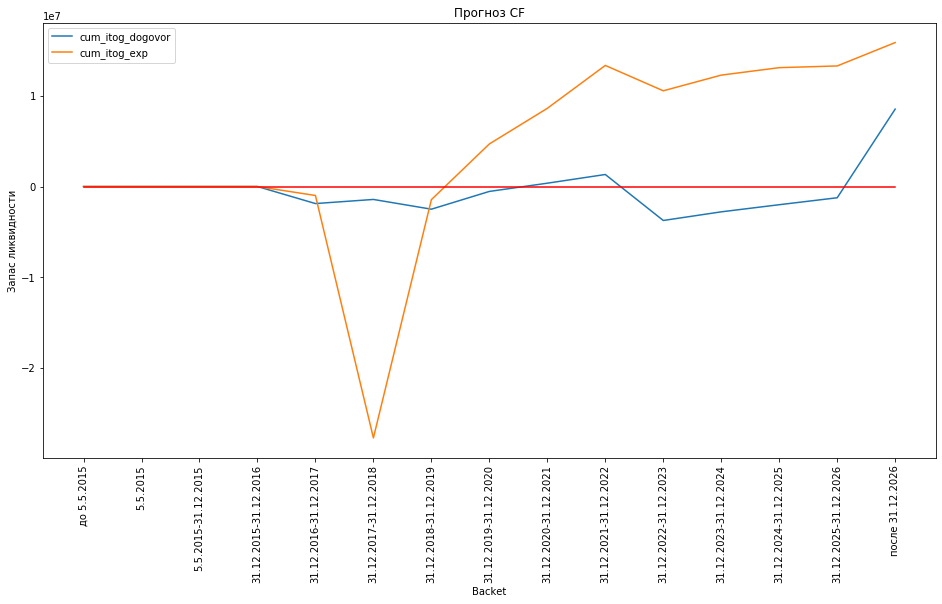

In [60]:
cf_itog_dogovor=cf_itog1.iloc[-5][1:]
cf_itog_exp=cf_itog2.iloc[-5][1:]
# cf_itog_stress=cf_itog3.iloc[-5][1:]

res1=cf_itog1.iloc[-5]
axisX=res1.index
axisX=axisX[1:]
y=np.zeros(len(axisX))
fig = plt.figure(figsize=(16,8))
plt.title("Прогноз CF") 
plt.xlabel("Backet")
plt.ylabel("Запас ликвидности")
plt.plot(axisX,cf_itog_dogovor, label="cum_itog_dogovor")
plt.plot(axisX,cf_itog_exp, label="cum_itog_exp")
# plt.plot(axisX,cf_itog_stress, label="cum_itog_stress")
plt.plot(axisX,y, 'r')
# plt.plot(axisX,result.iloc[:,0], label="itog")
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

# Динамика остатков по расчетным счетам физ.л

S:\Anaconda\lib\site-packages\ipykernel_launcher.py:281: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
S:\Anaconda\lib\site-packages\ipykernel_launcher.py:282: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
S:\Anaconda\lib\site-packages\ipykernel_launcher.py:285: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

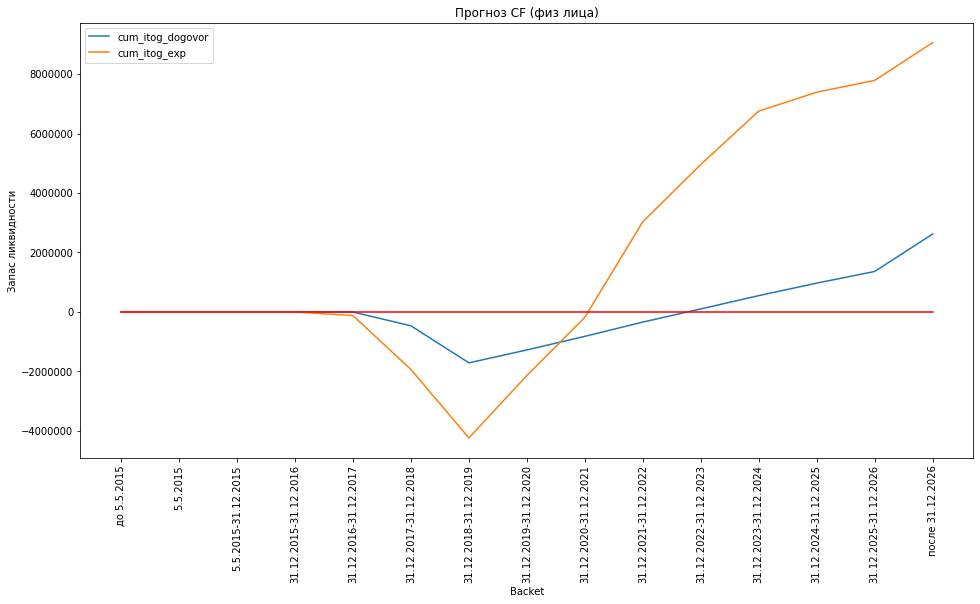

In [61]:
df_sdelka_id_fiz=df_sdelka_id.loc[df_sdelka_id['type_counterparty'].isin(['Частные лица-резиденты', 'Частные лица-нерезиденты'] )]


cf_itog1_fiz=CashFlow (df_sdelka_cf1,df_sdelka_id_fiz,df_cf, date_begin, date_gap, n_int)
cf_itog2_fiz=CashFlow (df_sdelka_cf2,df_sdelka_id_fiz,df_cf, date_begin, date_gap, n_int)

cf_itog_dogovor_fiz=cf_itog1_fiz.iloc[-5][1:]
cf_itog_exp_fiz=cf_itog2_fiz.iloc[-5][1:]
# cf_itog_stress_fiz=cf_itog[2].iloc[-5][1:]

axisX=res1.index
axisX=axisX[1:]
y=np.zeros(len(axisX))
fig = plt.figure(figsize=(16,8))
plt.title("Прогноз CF (физ лица)") 
plt.xlabel("Backet")
plt.ylabel("Запас ликвидности")
plt.plot(axisX,cf_itog_dogovor_fiz, label="cum_itog_dogovor")
plt.plot(axisX,cf_itog_exp_fiz, label="cum_itog_exp")
# plt.plot(axisX,cf_itog_stress_fiz, label="cum_itog_stress")
plt.plot(axisX,y, 'r')
# plt.plot(axisX,result.iloc[:,0], label="itog")
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

# Динамика остатков по расчетным счетам юр.л

S:\Anaconda\lib\site-packages\ipykernel_launcher.py:281: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
S:\Anaconda\lib\site-packages\ipykernel_launcher.py:282: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
S:\Anaconda\lib\site-packages\ipykernel_launcher.py:285: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

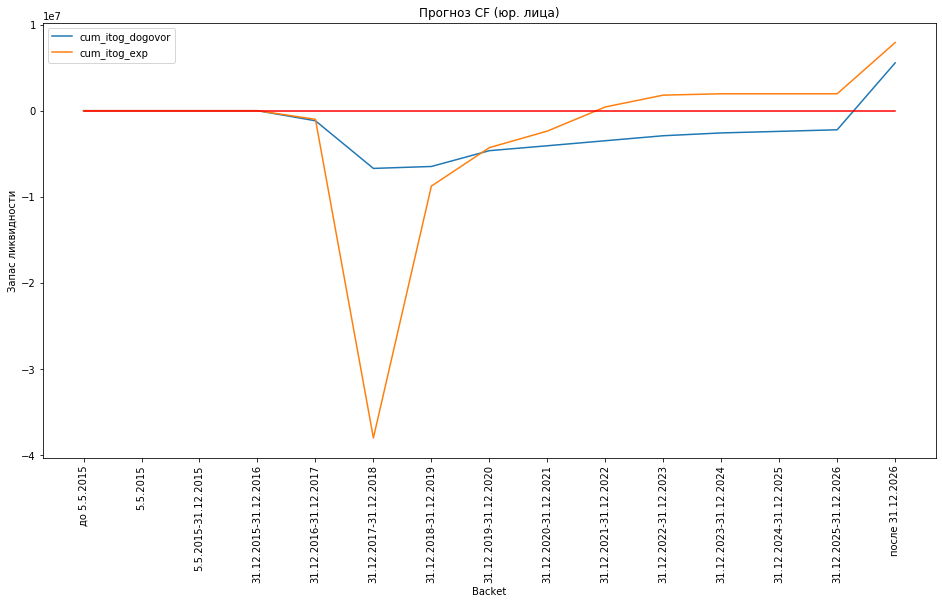

In [63]:
df_sdelka_id_yur=df_sdelka_id.loc[df_sdelka_id['type_counterparty'].isin(['Банки-резиденты', 'Банки-нерезиденты', 'Корпоративные клиенты-резиденты',
'Субъекты малого предпринимательства', 'Корпоративные клиенты-нерезиденты'] )]

cf_itog1_yur=CashFlow (df_sdelka_cf1,df_sdelka_id_yur,df_cf, date_begin, date_gap, n_int)
cf_itog2_yur=CashFlow (df_sdelka_cf2,df_sdelka_id_yur,df_cf, date_begin, date_gap, n_int)

cf_itog_dogovor_yur=cf_itog1_yur.iloc[-5][1:]
cf_itog_exp_yur=cf_itog2_yur.iloc[-5][1:]

# cf_itog_stress_fiz=cf_itog[2].iloc[-5][1:]

axisX=res1.index
axisX=axisX[1:]
y=np.zeros(len(axisX))
fig = plt.figure(figsize=(16,8))
plt.title("Прогноз CF (юр. лица)") 
plt.xlabel("Backet")
plt.ylabel("Запас ликвидности")
plt.plot(axisX,cf_itog_dogovor_yur, label="cum_itog_dogovor")
plt.plot(axisX,cf_itog_exp_yur, label="cum_itog_exp")
# plt.plot(axisX,cf_itog_stress_fiz, label="cum_itog_stress")
plt.plot(axisX,y, 'r')
# plt.plot(axisX,result.iloc[:,0], label="itog")
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

### Динамика денежной прибыли (только потоки по доходам и расходам)

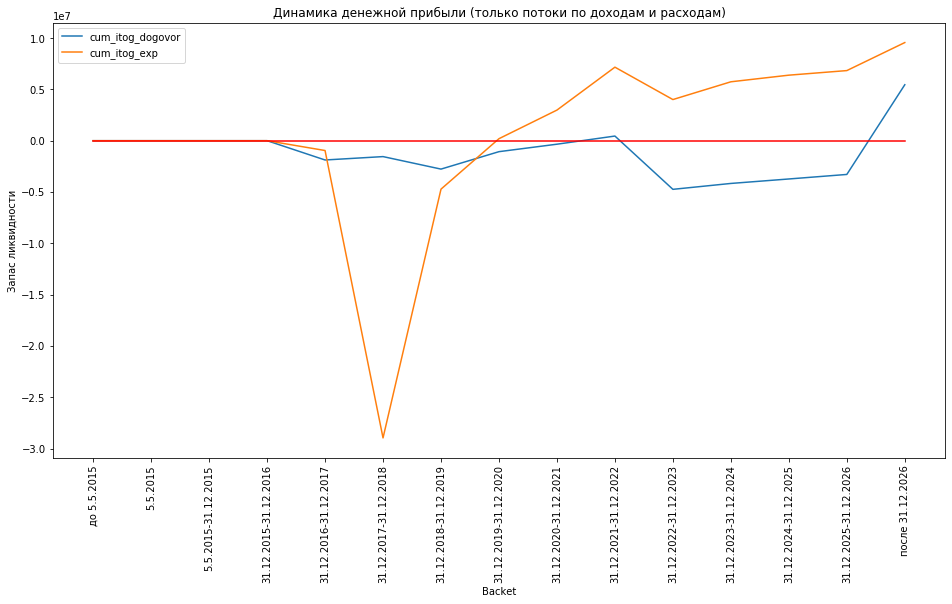

In [62]:

cf_itog1_pr=CashFlow (df_sdelka_cf1,df_sdelka_id,df_cf, date_begin, date_gap, n_int, input_output_only=True)
cf_itog2_pr=CashFlow (df_sdelka_cf2,df_sdelka_id,df_cf, date_begin, date_gap, n_int, input_output_only=True)


cf_itog_dogovor_pr=cf_itog1_pr.iloc[-5][1:]
cf_itog_exp_pr=cf_itog2_pr.iloc[-5][1:]

# cf_itog_stress_fiz=cf_itog[2].iloc[-5][1:]

axisX=res1.index
axisX=axisX[1:]
y=np.zeros(len(axisX))
fig = plt.figure(figsize=(16,8))
plt.title("Динамика денежной прибыли (только потоки по доходам и расходам)") 
plt.xlabel("Backet")
plt.ylabel("Запас ликвидности")
plt.plot(axisX,cf_itog_dogovor_pr, label="cum_itog_dogovor")
plt.plot(axisX,cf_itog_exp_pr, label="cum_itog_exp")
# plt.plot(axisX,cf_itog_stress_fiz, label="cum_itog_stress")
plt.plot(axisX,y, 'r')
# plt.plot(axisX,result.iloc[:,0], label="itog")
plt.xticks(rotation='vertical')
plt.legend()
plt.show()